<a href="https://colab.research.google.com/github/galvaowesley/DataScience_Learning/blob/master/DataScience_Learning/minicurso_dataScience/Semana_7/Covid_19_no_Brasil_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Covid 19 no Brasil - Análise de Dados
===
Wesley Galvão

Uma breve análise exploratória dos dados da COVID-19 no Brasil. A base de dados analisada está atualizada até o dia 08/07/2020. A versão mais atual pode ser encontrada em [Painel Corona Virus Brasil](https://covid.saude.gov.br/).

# Conhecendo o conjunto de dados

## Instalação e importação

Começamos com a importação das bibliotecas e datasets necessários. 

In [1]:
# Instalação das bibliotecas
install.packages(c('dplyr', 'tidyr','ggplot2', 'gridExtra', 'readxl', 'patchwork', 'scales','tidyquant' )) 

# Carregamento das bibliotecas
library(dplyr)     # Manipulação de dados 
library(tidyr)     # Manipulação de dados
library(ggplot2)   # Criação de graficos
library(gridExtra) # Arranjo dos plots
library(readxl)    # Leitura de arquivos em Excel
library(scales)    # trabalhar com escalas nos gráficos
library(tidyquant)  # Plotagem da média Móvel
# library(geobr)     # Datasets geoespaciais do Brasil
# library(sf)        # for spatial vector data
# library(tidymodels) # Modelagem e Machine Learning


# Configuração do ambiente
options(warn=-1)
options(repr.plot.width = 14, repr.plot.height = 8)

theme = 
  theme_minimal() +
  theme(
    plot.title    = element_text(size=18, face="bold", color="gray30"),
    plot.subtitle = element_text(size=15, color="gray30"),
    axis.title    = element_text(size=15, color="gray30"),
    plot.caption  = element_text(size=15, color = "gray60"),
    legend.text   = element_text(size=15, color="gray30"),
    legend.title  = element_text(size=15, color="gray30"),
    strip.text.x  = element_text(size=13, color="gray30")
  )


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘prodlim’, ‘future’, ‘globals’, ‘gower’, ‘ipred’, ‘furrr’, ‘hexbin’, ‘data.table’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘quadprog’, ‘zoo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘slider’, ‘anytime’, ‘forecast’, ‘farver’, ‘PerformanceAnalytics’, ‘quantmod’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘TTR’, ‘xts’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading requi

A função abaixo auxilia no cálculo da média móvel, utilizada na análise gráfica das séries temporais.

In [22]:
# Function to compute Simple Moving Average 
# source: https://stackoverflow.com/questions/743812/calculating-moving-average
moving_fun <- function(x, w, FUN, ...) {
  # x: a double vector
  # w: the length of the window, i.e., the section of the vector selected to apply FUN
  # FUN: a function that takes a vector and return a summarize value, e.g., mean, sum, etc.
  # Given a double type vector apply a FUN over a moving window from left to the right, 
  #    when a window boundary is not a legal section, i.e. lower_bound and i (upper bound) 
  #    are not contained in the length of the vector, return a NA_real_
  if (w < 1) {
    stop("The length of the window 'w' must be greater than 0")
  }
  output <- x
  for (i in 1:length(x)) {
     # plus 1 because the index is inclusive with the upper_bound 'i'
    lower_bound <- i - w + 1
    if (lower_bound < 1) {
      output[i] <- NA_real_
    } else {
      output[i] <- FUN(x[lower_bound:i, ...])
    }
  }
  output
}

In [4]:
# Carregamento da base de dados Painel Covid BR - atualizada até 08/07
caminho_painelCovid = '/content/HIST_PAINEL_COVIDBR_08jul2020-1.xlsx'
covid_8jul = read_xlsx(caminho_painelCovid, 
                    col_types = c(
                    "text",    # Regiao
                    "text",    # Estado
                    "text",    # Municipio
                    "text",    # coduf
                    "numeric", # codmun
                    "numeric", # codRegiaoSaude
                    "text",    # nomeRegiaoSaude
                    "date",    # data
                    "numeric", # semanaEpi
                    "numeric", # populacaoTCU2019
                    "numeric", # casosAcumulado
                    "numeric", # casosNovos
                    "numeric", # obitosAcumulado
                    "numeric", # obitosNovos
                    "numeric", # Recuperadosnovos
                    "numeric", # emAcompanhamentoNovos,
                    "numeric"  # interior/metropolitana
                    ))
# Converte o campo 'data' para o formato dia/mês/ano
covid_8jul$data = as.Date(covid_8jul$data)

## Características das bases de dados


A base de dados analisada contém 568708 registros organizados em 17 variáveis. Os registros diários estão categorizados de quatro formas:
* por município
* por estado
* por região da federação
* a nível nacional

In [5]:
# Estrutura do Painel Covid BR
head(covid_8jul)
# Dimensões
cat("Número de linhas: ", dim(covid_8jul)[1])
cat("\nNúmero de colunas: ", dim(covid_8jul)[2])

regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nordeste,PE,Abreu e Lima,26,260005,26010,RECIFE,2020-03-27,13,99990,0,0,0,0,NA,NA,1
Nordeste,PE,Abreu e Lima,26,260005,26010,RECIFE,2020-03-28,13,99990,0,0,0,0,NA,NA,1
Nordeste,PE,Abreu e Lima,26,260005,26010,RECIFE,2020-03-29,14,99990,0,0,0,0,NA,NA,1
Nordeste,PE,Abreu e Lima,26,260005,26010,RECIFE,2020-03-30,14,99990,0,0,0,0,NA,NA,1
Nordeste,PE,Abreu e Lima,26,260005,26010,RECIFE,2020-03-31,14,99990,0,0,0,0,NA,NA,1
Nordeste,PE,Abreu e Lima,26,260005,26010,RECIFE,2020-04-01,14,99990,0,0,0,0,NA,NA,1


Número de linhas:  568708
Número de colunas:  17

# Feature Engineering

Através das variáveis existentes, podemos criar novas que auxiliarão no entendimento do caso. Portando, partiremos para a criação de novas features, ou seja, variáveis.

## Coeficientes e taxas

O Ministério da Saúde disponibiliza, através do Painel Coronavírus [1], informações a respeito da evoluçãoda Covid-19 no Brasil, nos estados e cidades. De acordo com as informações do Painel e a apostila de *Medidas Epidemiológicas* do professor Márcio Luis Viola [4]:

### Coeficiente de incidência

O coeficiente de incidência é o número de casos confirmados de COVID-19 por 100 mil habitantes, na população residente em determinado espaço geográfico, no período considerado. Esta medida estima o risco de ocorrência de casos de COVID-19 numa determinada população num período considerado. 

$CI = \frac{número \ de \ casos \ confirmados}{população \  residente} \times 100000$

In [6]:
# Criação da feature coeficiente de incidência

covid_8jul = covid_8jul %>%
    #filter(!is.na(estado), !is.na(municipio)) %>%
    mutate(coefIncidencia = (casosAcumulado/populacaoTCU2019)*100000)


### Coeficiente de mortalidade



Coeficiente de mortalidade por COVID-19 é o número de óbitos por doenças COVID-19, por 100 mil habitantes, na população residente em determinado espaço geográfico, no ano considerado. Esta quantidade estima o risco de morte pela COVID-19 consideradas e dimensiona a sua magnitude como problema de saúde pública.

$CM = \frac{número \ de \ óbitos}{população \  residente} \times 100000$


In [7]:
covid_8jul = covid_8jul %>%
    #filter(!is.na(estado), !is.na(municipio)) %>%
    mutate(coefMortalidade = (obitosAcumulado/populacaoTCU2019)*100000)


### Taxa de letalidade


A Taxa de letalidade por COVID-19 é o número de óbitos confirmados de COVID-19 em relação ao total de casos confirmados, na população residente em determinado espaço geográfico, no período considerado. Esta taxa dá a idéia de gravidade da doença, pois indica o percentual de pessoas que morreram dentre os casos confirmados da doença.

$TL = \frac{número \ de \ óbitos \ confirmados}{número \ de \ casos \ confirmados} \times 100 \%$

In [8]:
covid_8jul = covid_8jul %>%
    #filter(!is.na(estado), !is.na(municipio)) %>%
    mutate(taxaLetalidade = (obitosAcumulado/casosAcumulado)*100)


## Subsets

Façamos dois subsets, ou seja, duas novas base de dados derivadas da principal. Por hora, nos interessa os dados a nível de região geográfica do país e a nível nacional. 

In [9]:
# Subset Brasil com dados gerais
covidBrasil = covid_8jul %>%
    filter(regiao == 'Brasil') %>%
    select(data, semanaEpi, 
           casosAcumulado, casosNovos, 
           obitosAcumulado, obitosNovos,
           Recuperadosnovos, emAcompanhamentoNovos, 
           coefIncidencia, coefMortalidade, taxaLetalidade)

In [10]:
# Subset regiao
covidRegiao = covid_8jul %>%
    filter(!is.na(estado) , is.na(municipio), !is.na(populacaoTCU2019) )

# Análise Exploratória dos Dados

Uma vez que temos conhecimento das variáveis e seus tipos, podemos agora analisar as bases de dados existentes a fim de encontrar padrões e relacionamentos entre os dados. 

# Brasil

Primeiramente, vejamos como a doença COVID-19 se comporta a nível nacional. Para isso, criaremos um sumário geral contento informações relevantes.

In [11]:
# Sumário geral da COVID19 no Brasil até 08/07/2020
sumario_geral = covidBrasil %>% 
    filter(data == '2020-07-08')  %>% 
    select(casosNovos, casosAcumulado, 
           obitosNovos, obitosAcumulado, 
           Recuperadosnovos, coefIncidencia, 
           coefMortalidade, taxaLetalidade) %>%
    summarise("Casos Novos" = sum(casosNovos), 
              "Casos Acumulados" = sum(casosAcumulado), 
              "Óbitos Novos" = obitosNovos, 
              "Óbitos Acumulados" = obitosAcumulado,
              "Recuperados" =  Recuperadosnovos,
              "Incidência/100mil hab" = round(coefIncidencia,2),
              "Mortalidade/100mil hab" = round(coefMortalidade,2),
              "Taxa Letalidade (%)" = round(taxaLetalidade,2))
sumario_geral

Casos Novos,Casos Acumulados,Óbitos Novos,Óbitos Acumulados,Recuperados,Incidência/100mil hab,Mortalidade/100mil hab,Taxa Letalidade (%)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44571,1713160,1223,67964,1020901,815.22,32.34,3.97


### Casos confirmados

Os gráficos de casos novos e casos acumulados podem ajudar no dimensionamento do problema que é pandemia e como ela cresce no país. 

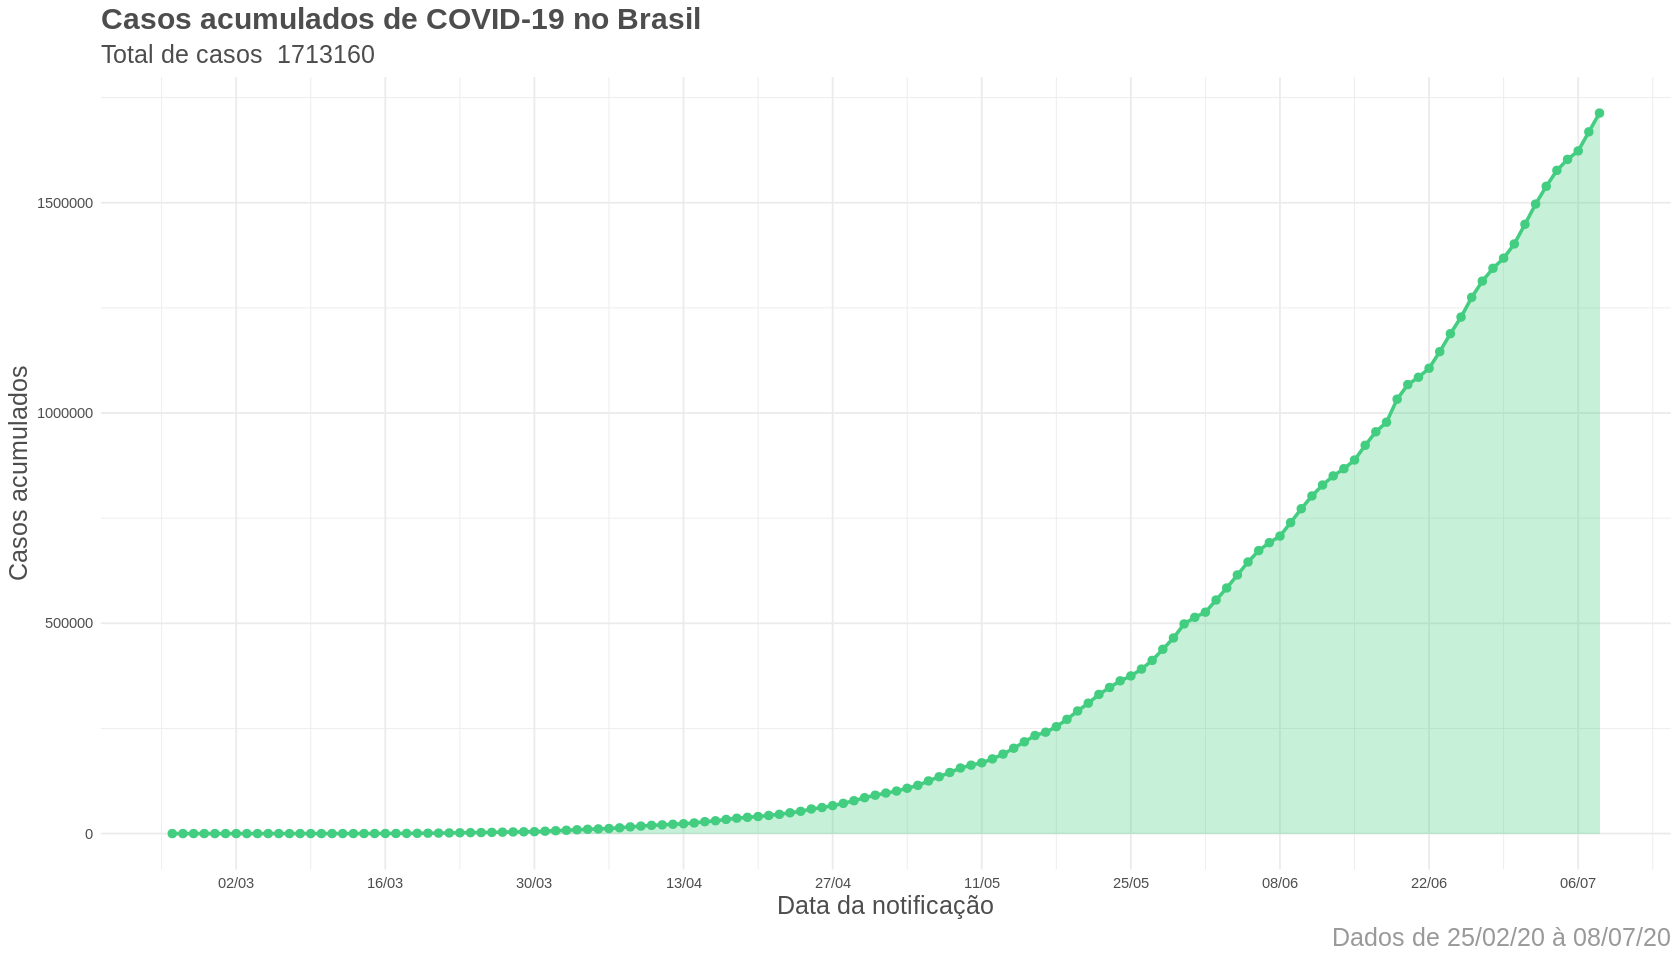

In [12]:
# Gráfico de casos acumulados
graph1 = ggplot(covidBrasil) +
         geom_line(aes(data, casosAcumulado), color = "seagreen3", size=1) + 
         geom_point(aes(data, casosAcumulado),color = "seagreen3",size=2) +
         geom_area(aes(data, casosAcumulado), fill  = "seagreen3",alpha=0.3)  + 
         scale_x_date(date_breaks = "2 week", date_labels = "%d/%m") + 
         labs(
             title = "Casos acumulados de COVID-19 no Brasil",
             subtitle = paste("Total de casos ", 
                              sumario_geral$`Casos Acumulados`),
             x = "Data da notificação",
             y = "Casos acumulados",
             caption = paste("Dados de 25/02/20 à 08/07/20")
         ) +
         theme + 
         theme(legend.position="none")
graph1

Vejamos agora a distribuição de casos novos diários desde o primeiro dia epidemiológico. A curva em vermelho é o comportamento da média móvel, calculada a partir de amostras sequenciais, neste caso, a cada semana epidemiológica. 

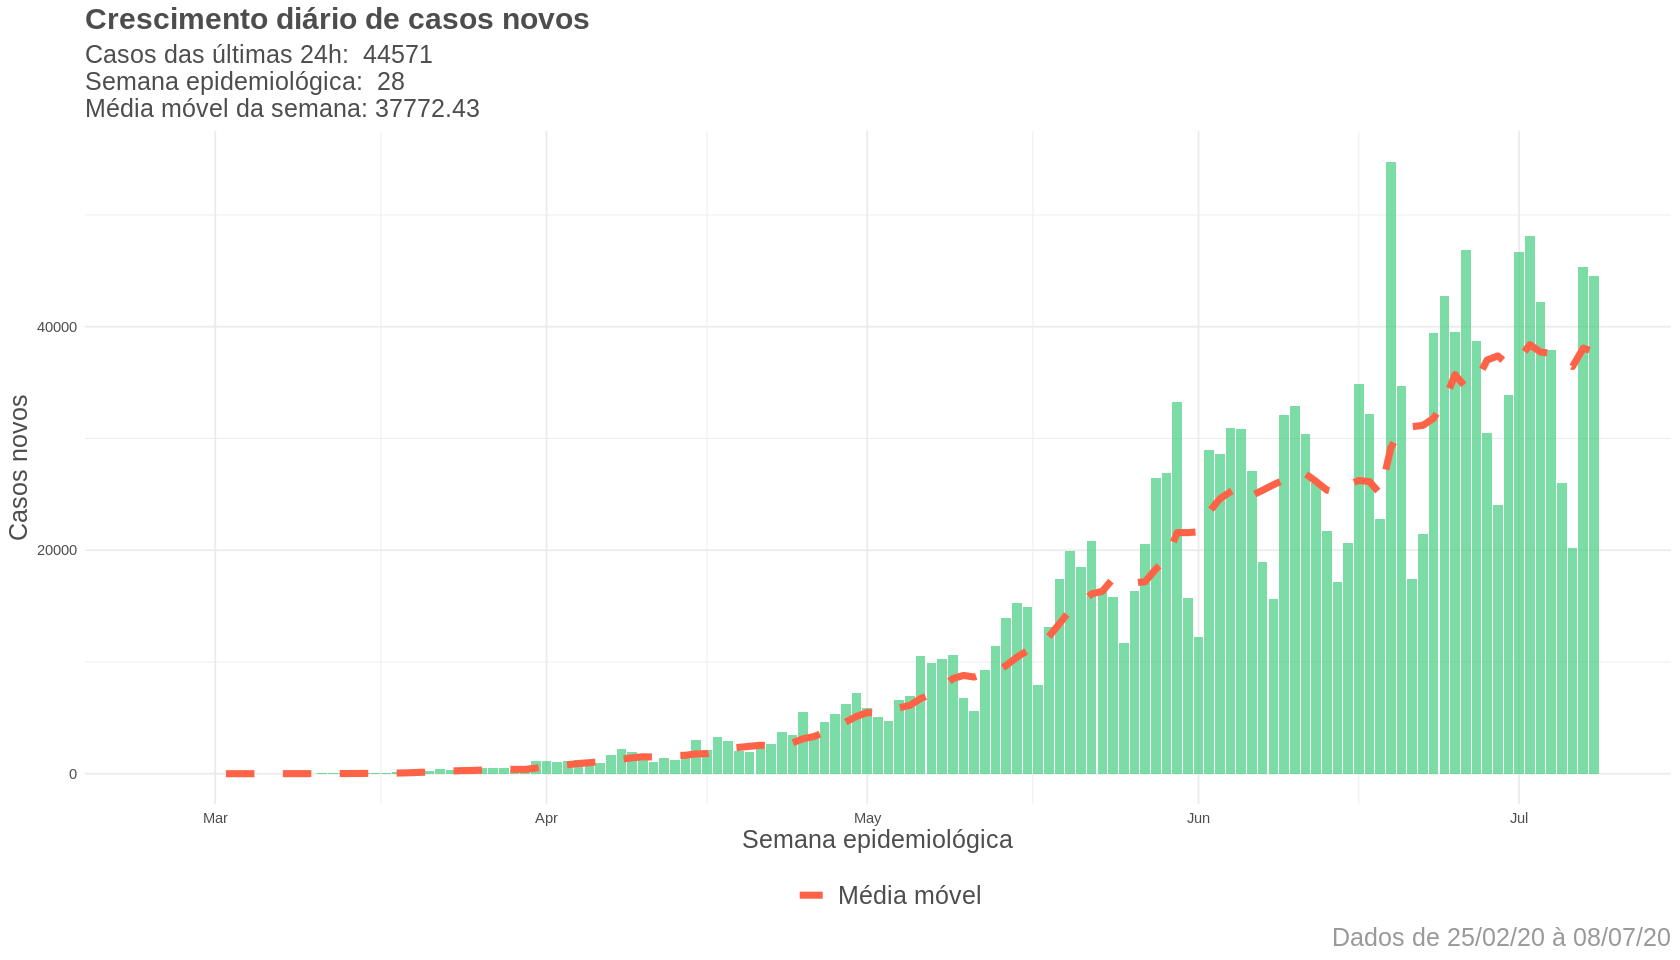

In [13]:
# Gráfico de casos novos por semana epidemiológica
graph2 = ggplot(covidBrasil, aes(x = data, y = casosNovos)) +        
         geom_bar(stat = "identity", fill = "seagreen3", alpha= 0.7)  +
         geom_ma(aes(color = 'tomato1'),  ma_fun = SMA, n = 7, size = 2 ,show.legend = TRUE) + 
         labs(
             title = "Crescimento diário de casos novos ",
             subtitle = paste("Casos das últimas 24h: ",sumario_geral$`Casos Novos`,
                             "\nSemana epidemiológica: ",max(covidBrasil$semanaEpi),
                             "\nMédia móvel da semana:", 
                              round(last(moving_fun(covidBrasil$casosNovos, 7, mean)),2)), #Média móvel da semana  atual
             x = "Semana epidemiológica",
             y = "Casos novos",
             caption = paste("Dados de 25/02/20 à 08/07/20")) +
         
         scale_y_continuous(labels = comma_format(big.mark = "")) +
         scale_colour_manual(
             name = " ",
             guide = 'legend',
             values = 'tomato1',
             labels = 'Média móvel') +
         theme  + theme(legend.position="bottom")             
         
         
graph2 

### Óbitos

De maneira semelhante, podemos analisar o quadro de óbitos devido à COVID-19. 

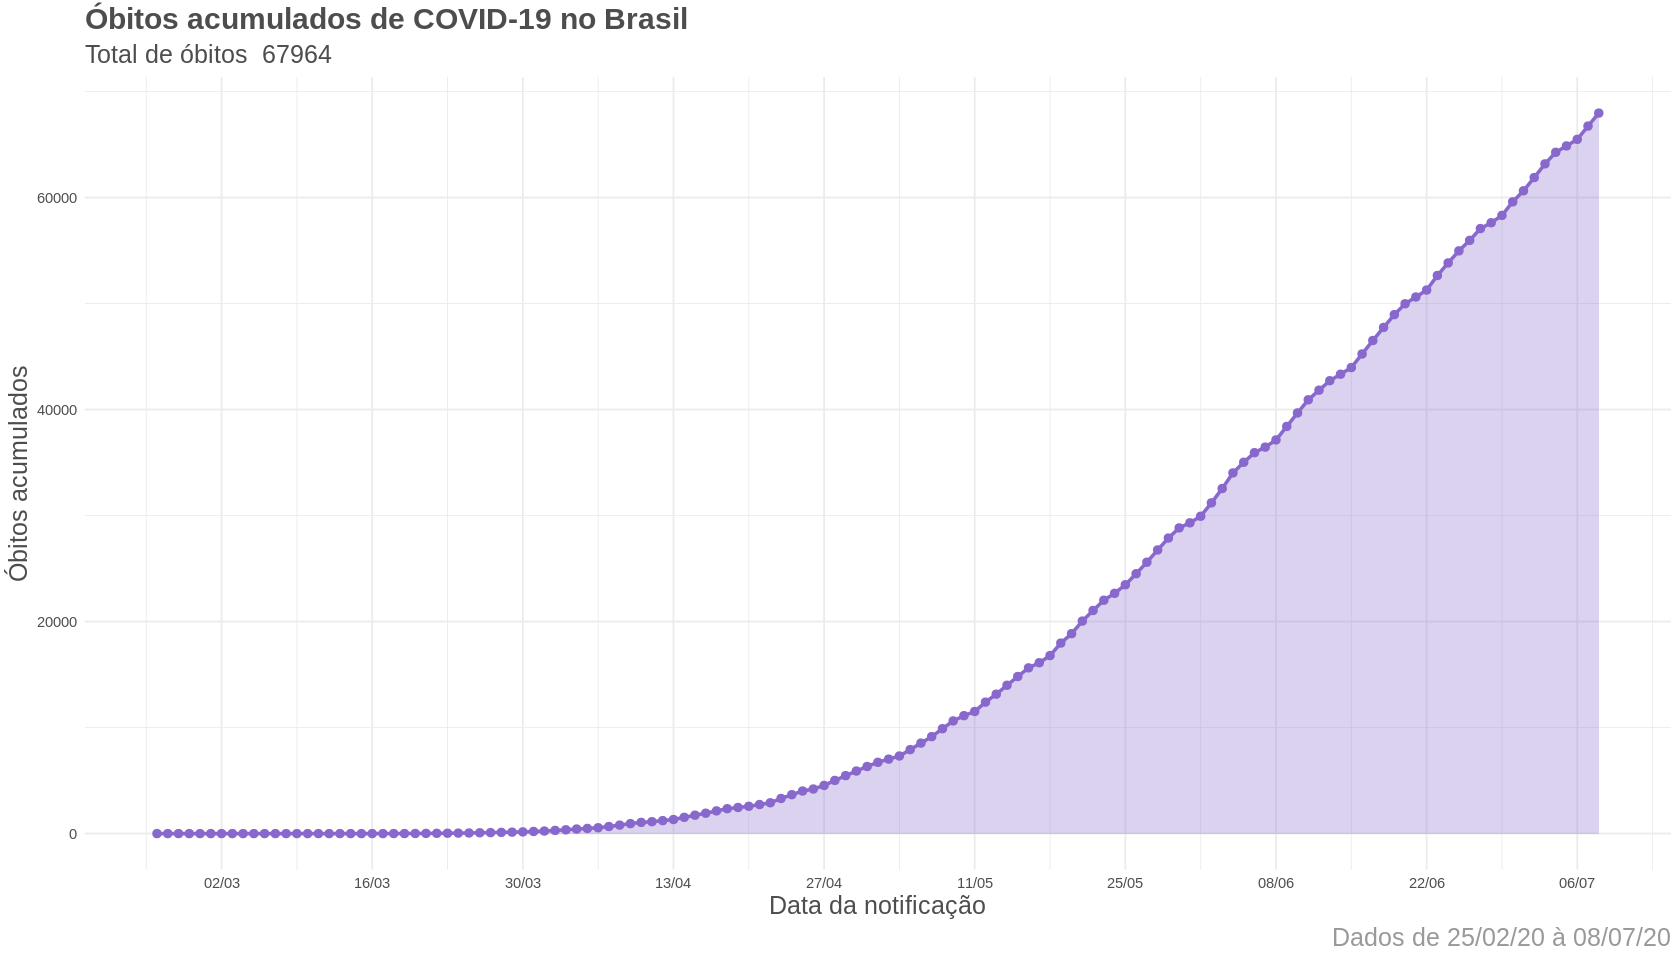

In [14]:
# Gráfico de óbitos acumulados
graph3 = ggplot(covidBrasil) +
         geom_line(aes(data, obitosAcumulado), color = "mediumpurple3", size=1) + 
         geom_point(aes(data, obitosAcumulado),color = "mediumpurple3",size=2) +
         geom_area(aes(data, obitosAcumulado), fill  = "mediumpurple3",alpha=0.3)  + 
         scale_x_date(date_breaks = "2 week", date_labels = "%d/%m") + 
         labs(
             title = "Óbitos acumulados de COVID-19 no Brasil",
             subtitle = paste("Total de óbitos ", 
                                sumario_geral$`Óbitos Acumulados`),
             x = "Data da notificação",
             y = "Óbitos acumulados",
             caption = paste("Dados de 25/02/20 à 08/07/20")
         ) +
         theme + 
         theme(legend.position="none")
graph3

O próximo gráfico é a distribuição de óbitos novos diários juntamente com a curva da média móvel.

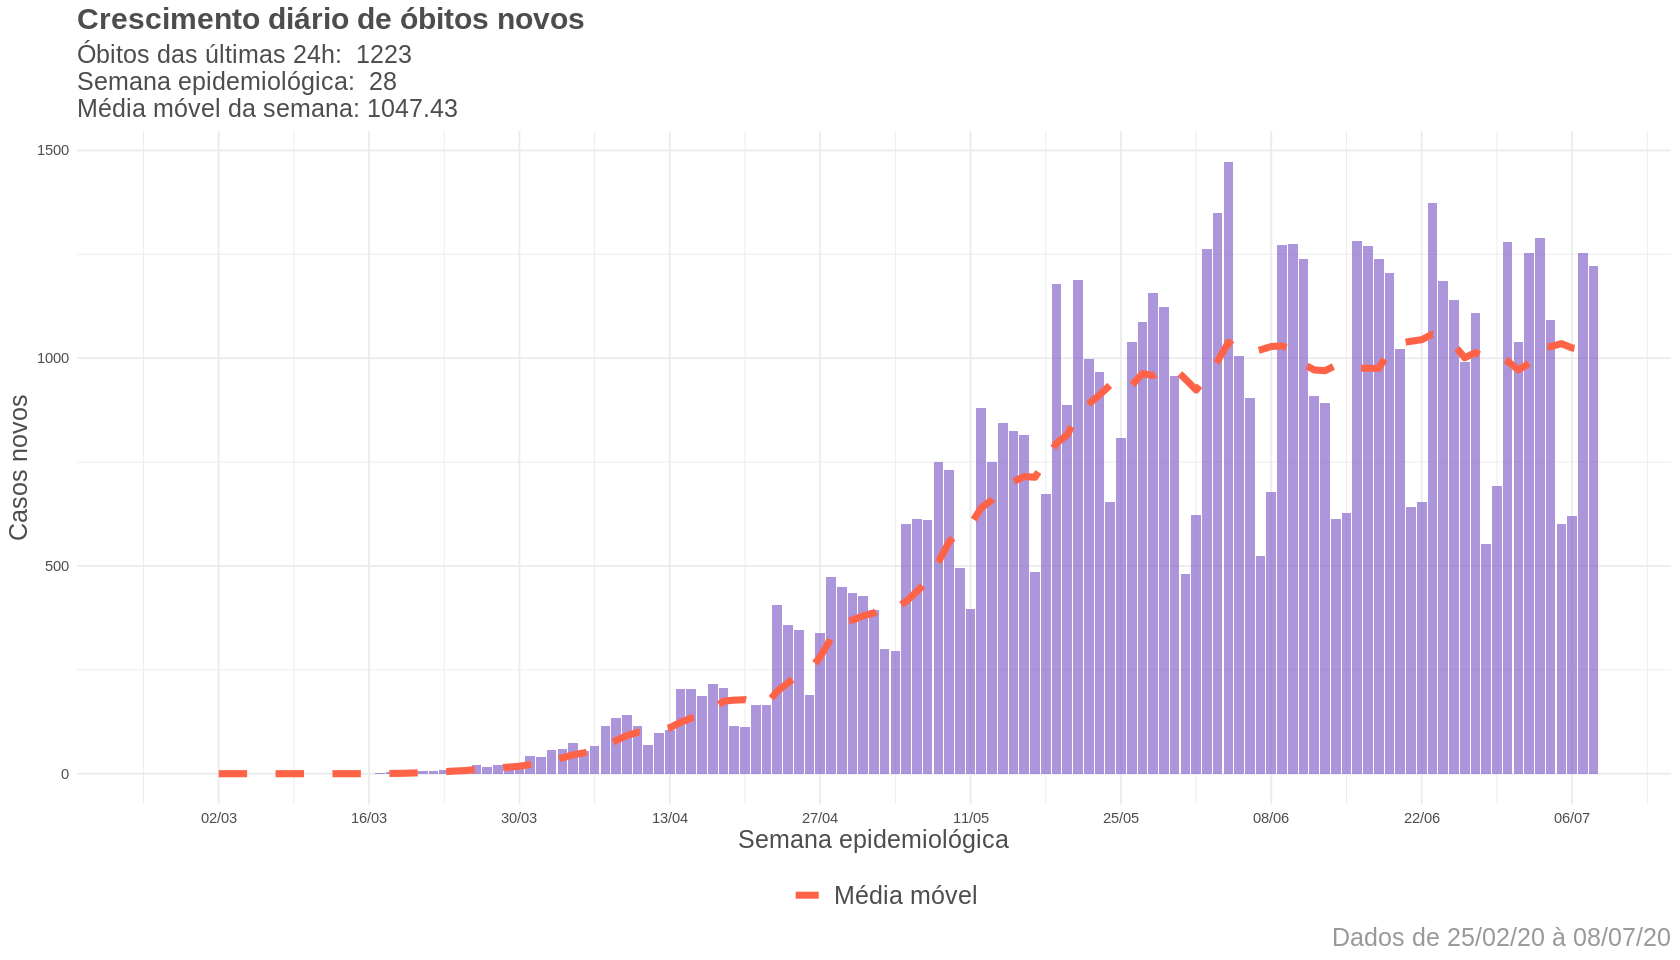

In [15]:
# Gráfico de óbitos novos diários
graph4 = ggplot(covidBrasil, aes(x = data, y = obitosNovos)) +        
         geom_bar(stat = "identity", fill = "mediumpurple3", alpha= 0.7)  +
         geom_ma(aes(color = 'tomato1'),  ma_fun = SMA, n = 7, size = 2 ,show.legend = TRUE) + 
         scale_x_date(date_breaks = "2 week", date_labels = "%d/%m") +
         labs(
             title = "Crescimento diário de óbitos novos ",
             subtitle = paste("Óbitos das últimas 24h: ",sumario_geral$`Óbitos Novos`,
                             "\nSemana epidemiológica: ",max(covidBrasil$semanaEpi),
                             "\nMédia móvel da semana:", 
                              round(last(moving_fun(covidBrasil$obitosNovos, 7, mean)),2)), #Média móvel da semana  atual
             x = "Semana epidemiológica",
             y = "Casos novos",
             caption = paste("Dados de 25/02/20 à 08/07/20")) +
         scale_colour_manual(
             name = " ",
             guide = 'legend',
             values = 'tomato1',
             labels = 'Média móvel') + 

         theme + theme(legend.position="bottom")                
         
         
graph4 

Ao olharmos para a taxa de letalidade ao longo do tempo, nota-se que o pico foi atingido em meados de maio. A taxa segue numa aparente queda.  

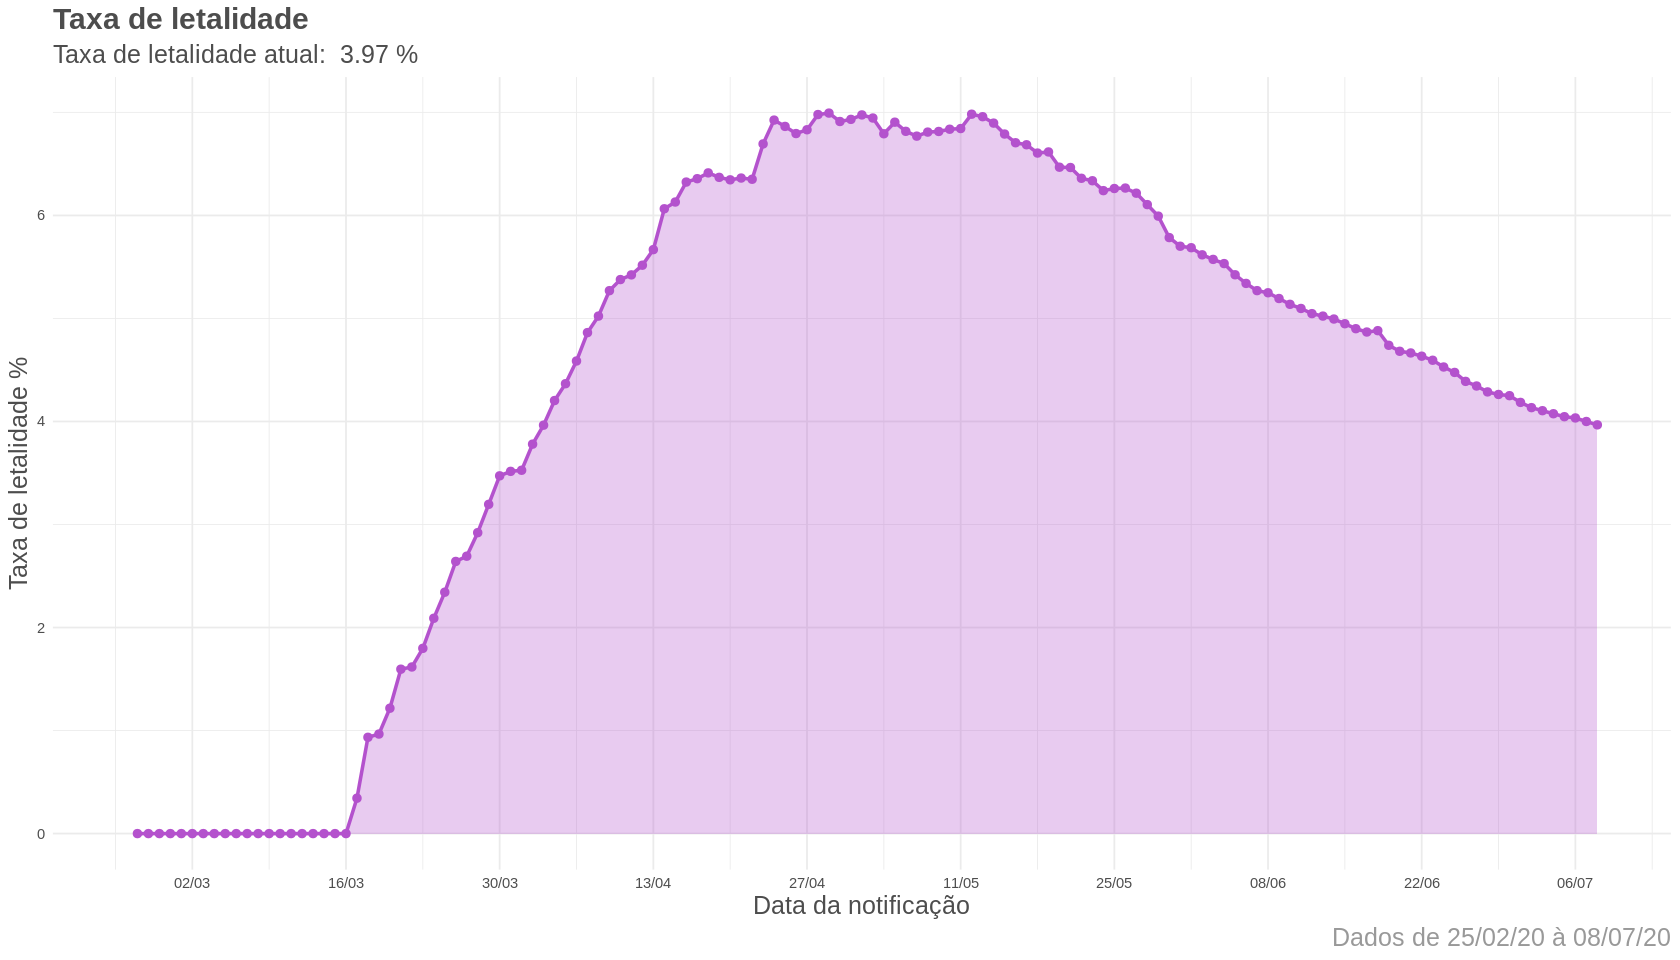

In [16]:
# Gráfico de crescimento do coeficiente de incidência por 100mil hab
graph5 = ggplot(covidBrasil) +
         geom_line(aes(data, taxaLetalidade), color = "mediumorchid3", size=1) + 
         geom_point(aes(data, taxaLetalidade),color = "mediumorchid3",size=2) +
         geom_area(aes(data, taxaLetalidade), fill  = "mediumorchid3",alpha=0.3)  + 
         scale_x_date(date_breaks = "2 week", date_labels = "%d/%m") + 
         labs(
             title = "Taxa de letalidade",
             subtitle = paste("Taxa de letalidade atual: ", 
                              round(sumario_geral$`Taxa Letalidade (%)`,2),"%"),
             x = "Data da notificação",
             y = "Taxa de letalidade %",
             caption = paste("Dados de 25/02/20 à 08/07/20")
         ) +
         theme + 
         theme(legend.position="none")
graph5


Traçar os novos casos e mortes diários usando uma escala logarítmica no eixo y, nos dá a percepção de que os casos e mortes provavelmente estão aumentando em uma taxa semelhante. Para tanto, usaremos o coeficiente de correlação de Pearson. 

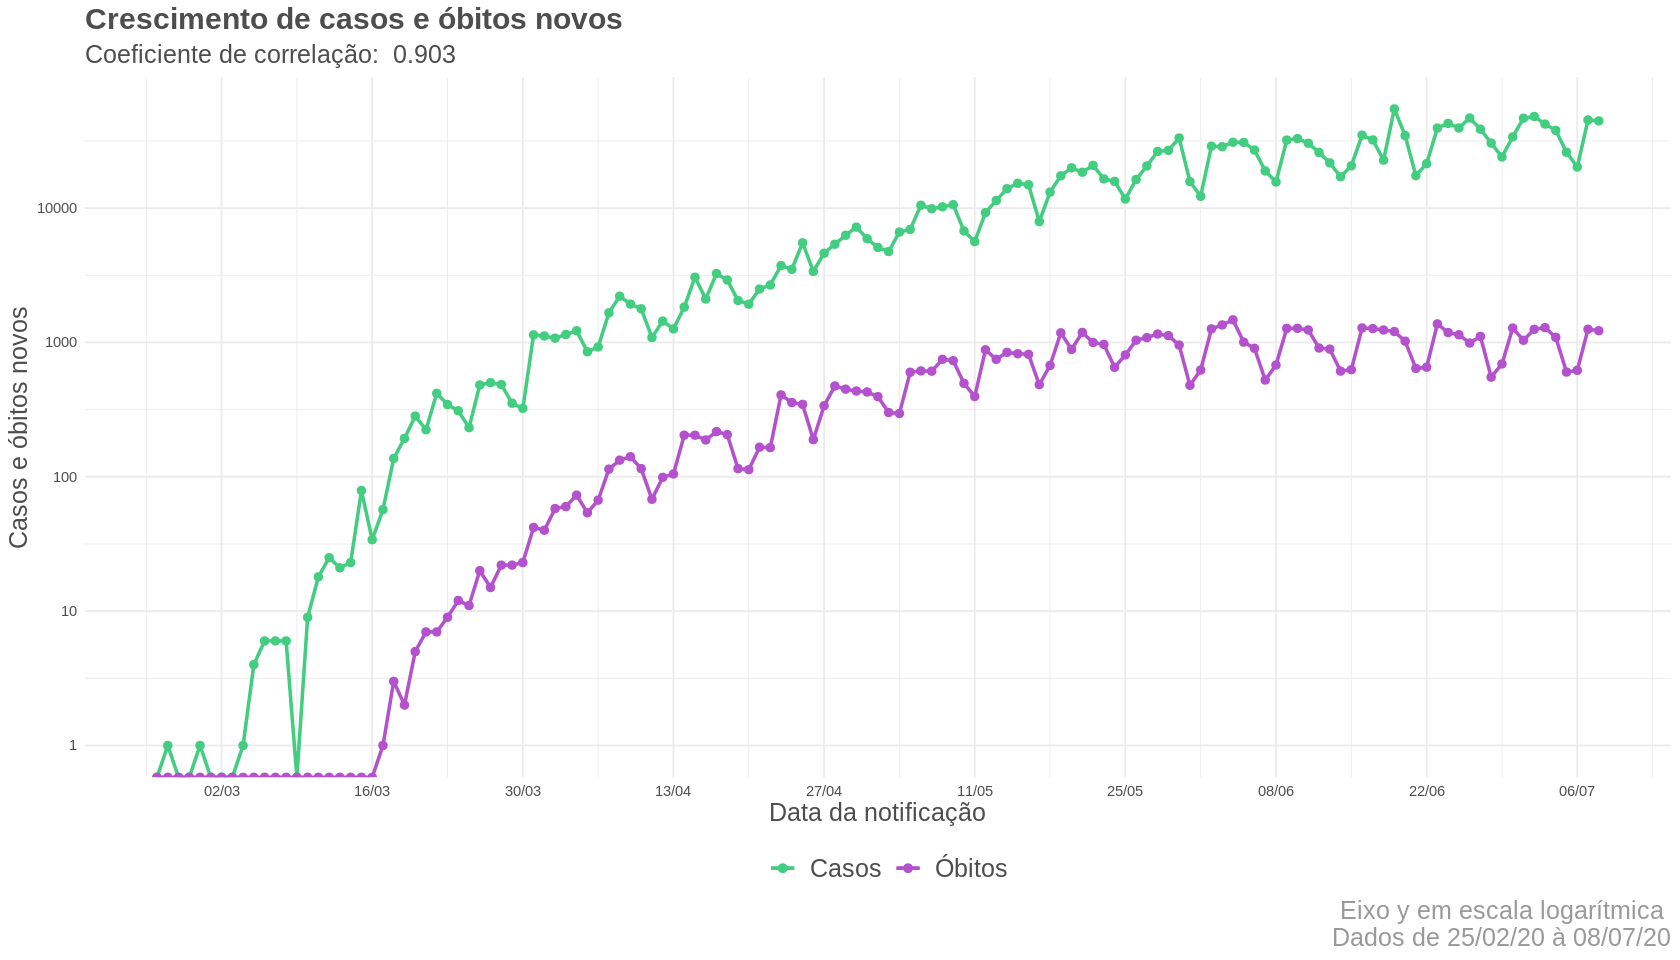

In [17]:
# Gráfico de correlação entre crescimento de casos e óbitos novos
graph6 = ggplot(covidBrasil) +
         geom_line(aes(data, casosNovos, color  = "seagreen3"), size=1) + 
         geom_point(aes(data, casosNovos,color  = "seagreen3"), size=2) +
         geom_line(aes(data, obitosNovos, color = "mediumorchid3"), size=1) + 
         geom_point(aes(data, obitosNovos,color = "mediumorchid3"), size=2) +
         scale_x_date(date_breaks = "2 week", date_labels = "%d/%m") + 
         scale_y_log10() +
         labs(
             title = "Crescimento de casos e óbitos novos",
             subtitle = paste("Coeficiente de correlação: ", 
                              round(cor(covidBrasil$casosNovos,covidBrasil$obitosNovos),3)),
             x = "Data da notificação",
             y = "Casos e óbitos novos",
             caption = paste("Eixo y em escala logarítmica",
                             "\nDados de 25/02/20 à 08/07/20")) +
         scale_color_identity(
            name = " ",
            breaks = c("seagreen3", "mediumorchid3"),
            labels = c("Casos", "Óbitos"),
            guide = "legend"
          ) +
         theme + theme(legend.position="bottom")  
graph6

Dado que o coeficiente é 0.903, isso indica um alto grau de correlação entre a taxa novos casos e novos óbitos no decorrer do tempo. 

## Por região

Vejamos agora o comportamento da pandemia a nível regional. 

In [18]:
# Sumário da COVID19 por região até 08/07/2020
sumarioRegiao = covidRegiao %>% 
        filter(covidRegiao$data == '2020-07-08')  %>% 
        select(regiao, casosNovos, casosAcumulado, 
               obitosNovos, obitosAcumulado, 
               Recuperadosnovos, coefIncidencia, 
               coefMortalidade, taxaLetalidade, populacaoTCU2019)  %>% 
        group_by(regiao) %>% 
        summarise("Casos Novos" = sum(casosNovos), 
                  "Casos Acumulados" = sum(casosAcumulado), 
                  "Óbitos Novos" = sum(obitosNovos), 
                  "Óbitos Acumulados" = sum(obitosAcumulado),
                  "Incidência/100mil hab" = round((sum(casosAcumulado)/sum(populacaoTCU2019)*100000),2),
                  "Mortalidade/100mil hab" = round((sum(obitosAcumulado)/sum(populacaoTCU2019)*100000),2),
                  "Taxa Letalidade (%)" = round((sum(obitosAcumulado)/sum(casosAcumulado)*100),2)) %>%
        arrange("Casos Novos")
sumarioRegiao

`summarise()` ungrouping output (override with `.groups` argument)



regiao,Casos Novos,Casos Acumulados,Óbitos Novos,Óbitos Acumulados,Incidência/100mil hab,Mortalidade/100mil hab,Taxa Letalidade (%)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Centro-Oeste,4781,131876,108,2550,809.20,15.65,1.93
Nordeste,14183,580628,427,22032,1017.37,38.60,3.79
Norte,5098,302308,91,10206,1640.22,55.37,3.38
Sudeste,15877,590266,506,31024,667.94,35.11,5.26
Sul,4632,108082,91,2152,360.56,7.18,1.99


A região sudeste segue com o maior número de casos e óbitos. 

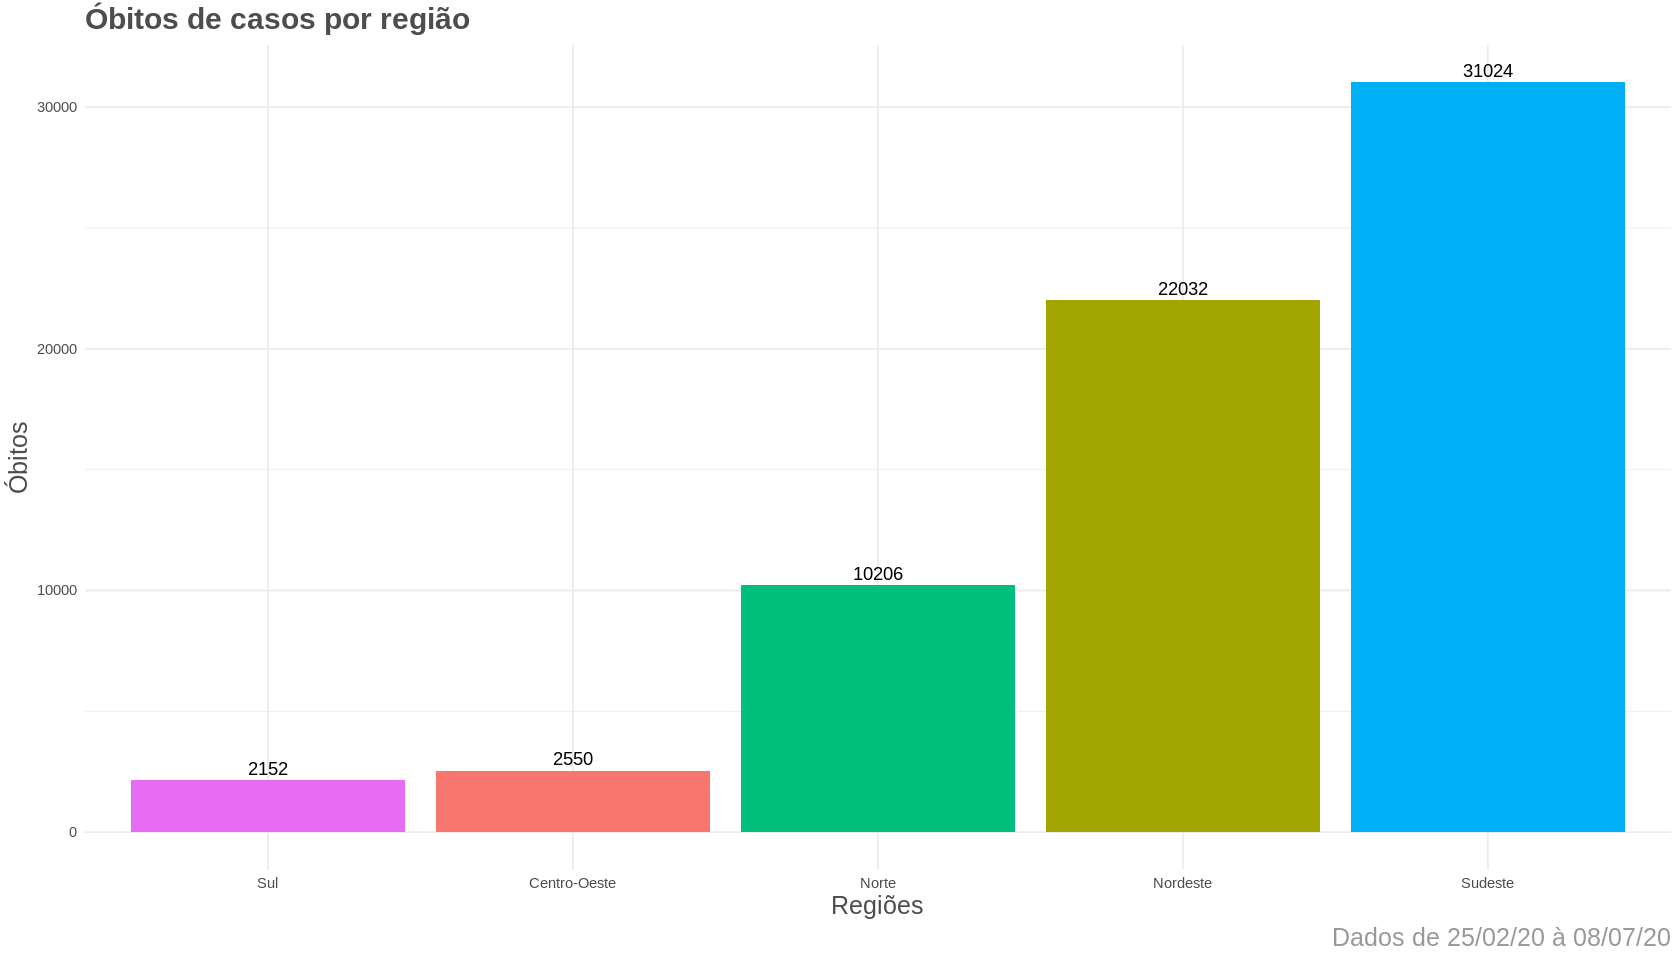

In [19]:
# Gráfico de número de óbitos por região
graph7 = ggplot(sumarioRegiao,aes(x = reorder(regiao, sumarioRegiao$`Óbitos Acumulados`), 
                                  y  = sumarioRegiao$`Óbitos Acumulados`)) +
         geom_bar(aes(fill  = regiao), stat = "identity") +
         geom_text(aes(label = sumarioRegiao$`Óbitos Acumulados`, vjust = -0.4) ) + 
         labs(
             title = "Óbitos de casos por região",
             x = "Regiões",
             y = "Óbitos",
             face = "bold",
             caption = paste("Dados de 25/02/20 à 08/07/20")) +

         theme + theme(legend.position="none")  
graph7

Embora o sudeste se destaque em casos e óbitos, o mesmo não apresenta o maior índice de mortalidade. Vale a pena verificar em quais estados isso acontece. 

In [20]:
sumarioEstados = covidRegiao %>% 
        filter(covidRegiao$data == '2020-07-08')  %>% 
        select(estado, casosNovos, casosAcumulado, 
               obitosNovos, obitosAcumulado, 
               Recuperadosnovos, coefIncidencia, 
               coefMortalidade, taxaLetalidade, populacaoTCU2019)  %>% 
        group_by(estado) %>% 
        summarise("Casos Novos" = sum(casosNovos), 
                  "Casos Acumulados" = sum(casosAcumulado), 
                  "Óbitos Novos" = sum(obitosNovos), 
                  "Óbitos Acumulados" = sum(obitosAcumulado),
                  "Incidência/100mil hab" = round((sum(casosAcumulado)/sum(populacaoTCU2019)*100000),2),
                  "Mortalidade/100mil hab" = round((sum(obitosAcumulado)/sum(populacaoTCU2019)*100000),2),
                  "Taxa Letalidade (%)" = round((sum(obitosAcumulado)/sum(casosAcumulado)*100),2))

`summarise()` ungrouping output (override with `.groups` argument)



O coeficiente de mortalidade e taxa de letalidade por estado são dados a seguir. 

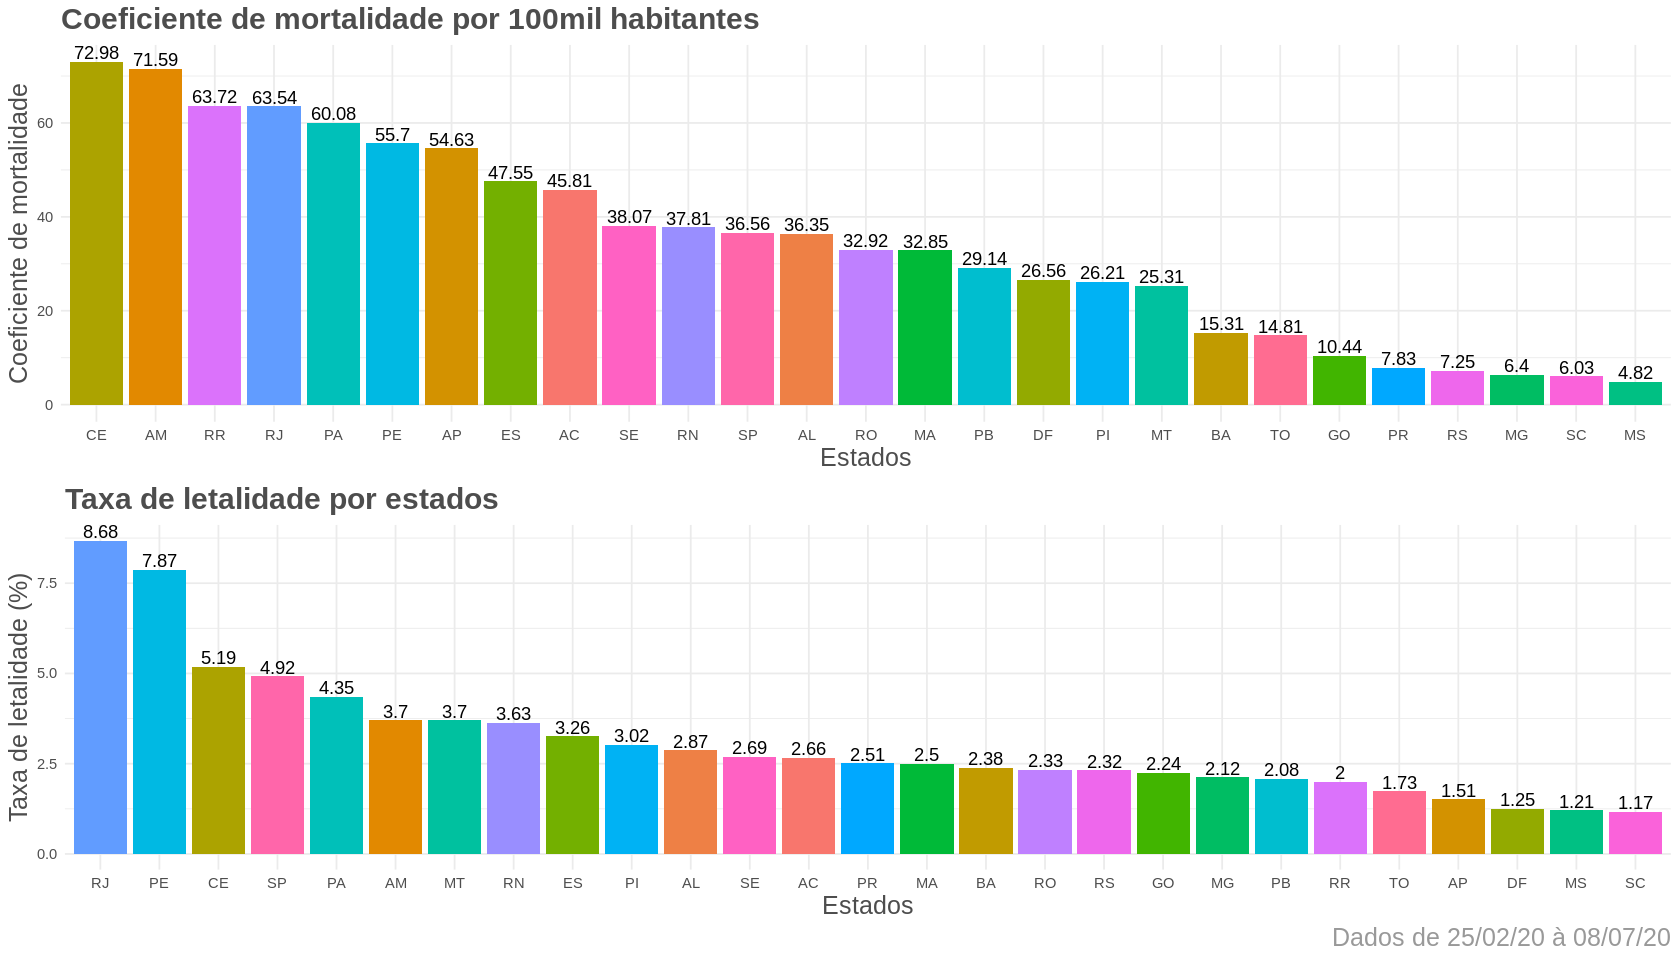

In [21]:
# Gráfico de coeficiente de mortalidade por 100mil hab
graph8 = ggplot(sumarioEstados,aes(x = reorder(estado, -sumarioEstados$`Mortalidade/100mil hab`),
                                  y = sumarioEstados$`Mortalidade/100mil hab`)) +
         geom_bar(aes(fill  = estado), stat = "identity") +
         geom_text(aes(label = sumarioEstados$`Mortalidade/100mil hab`, vjust = -0.2) ) + 
         labs(
             title = "Coeficiente de mortalidade por 100mil habitantes",
             x = "Estados",
             y = "Coeficiente de mortalidade",
             face = "bold"
             ) +

         theme + theme(legend.position="none") 

# Gráfico da taxa de letalidade por estados da federação
graph9 = ggplot(sumarioEstados,aes(x = reorder(estado, -sumarioEstados$`Taxa Letalidade (%)`),
                                  y = sumarioEstados$`Taxa Letalidade (%)`)) +
         geom_bar(aes(fill  = estado), stat = "identity") +
         geom_text(aes(label = sumarioEstados$`Taxa Letalidade (%)`,
                       vjust = - 0.2) ) + 
         labs(
             title = "Taxa de letalidade por estados",
             x = "Estados",
             y = "Taxa de letalidade (%)",
             face = "bold",
             caption = paste("Dados de 25/02/20 à 08/07/20")) +

         theme + theme(legend.position="none")  
grid.arrange(graph8, graph9, nrow = 2)

Até a data da análise, o estado do Ceará detém o maior coeficiente de mortalidade e o Rio de Janeiro a maior taxa de letalidade. 

# Referências
1. [Painel Corona Virus Brasil](https://covid.saude.gov.br/)
2. [Coronavirus (COVID-19) - Brazil Dataset : Brazil Cities Coordinates](https://www.kaggle.com/unanimad/corona-virus-brazil?select=brazil_cities_coordinates.csv)
3. [Analyzing and Predicting COVID-19, Updated 05-20](https://www.kaggle.com/pedrohenriquecardoso/analyzing-and-predicting-covid-19-updated-05-20)
4. [O atropelo da Estatística durante a pandemia de Covid-19: Medidas epidemiológicas - Márcio Luis Lanfredi Viola](https://www.dropbox.com/s/agobxm50emy59fi/Aula%204%20-%20Medidas%20Epidemiol%C3%B3gicas.pdf?dl=0)
